In [23]:
setwd("F:\\Quantiphi - Modelling problem")
library(data.table)
library(ggplot2)

mdata <- fread("Training Sheet.csv")

mdata <- mdata[,`:=`(id = NULL, name = NULL, display_name = NULL, board_rating_reason = NULL)]
mdata <- data.frame(mdata)

summary(mdata)

 production_year  movie_sequel     creative_type         source         
 Min.   :2007    Min.   :0.00000   Length:1196        Length:1196       
 1st Qu.:2008    1st Qu.:0.00000   Class :character   Class :character  
 Median :2009    Median :0.00000   Mode  :character   Mode  :character  
 Mean   :2009    Mean   :0.09783                                        
 3rd Qu.:2010    3rd Qu.:0.00000                                        
 Max.   :2011    Max.   :1.00000                                        
 production_method     genre             language        
 Length:1196        Length:1196        Length:1196       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
 movie_board_rating_display_name movie_release_pattern_display_name
 Length:1196   

In [18]:
#Checking no. of categories in each column
sapply(mdata, function(x) length(unique(x)))


production_year                       movie_sequel 
                                 5                                  2 
                     creative_type                             source 
                                 9                                 16 
                 production_method                              genre 
                                 6                                 13 
                          language    movie_board_rating_display_name 
                                16                                  6 
movie_release_pattern_display_name                              total 
                                 7                                324 
                          Category 
                                 9

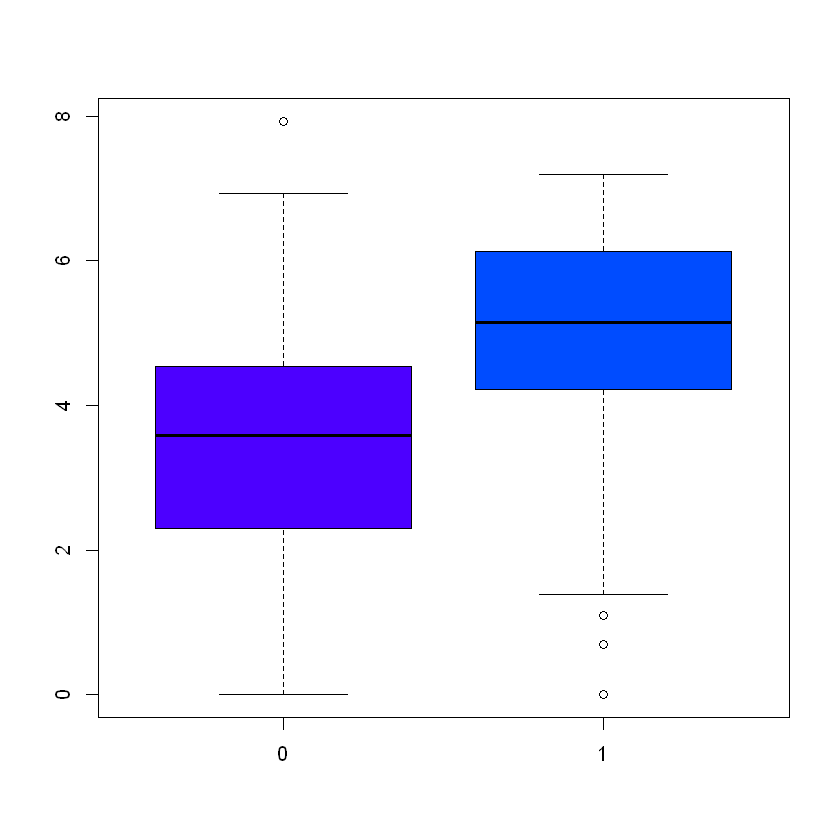

In [9]:
#Analyzing the total column
boxplot(log(mdata$total) ~ mdata$movie_sequel , col = topo.colors(5))


   Contemporary Fiction           Dramatization                 Factual 
                    638                      95                      60 
                Fantasy      Historical Fiction            Kids Fiction 
                    131                     100                      59 
Multiple Creative Types         Science Fiction              Super Hero 
                      4                      89                      20 

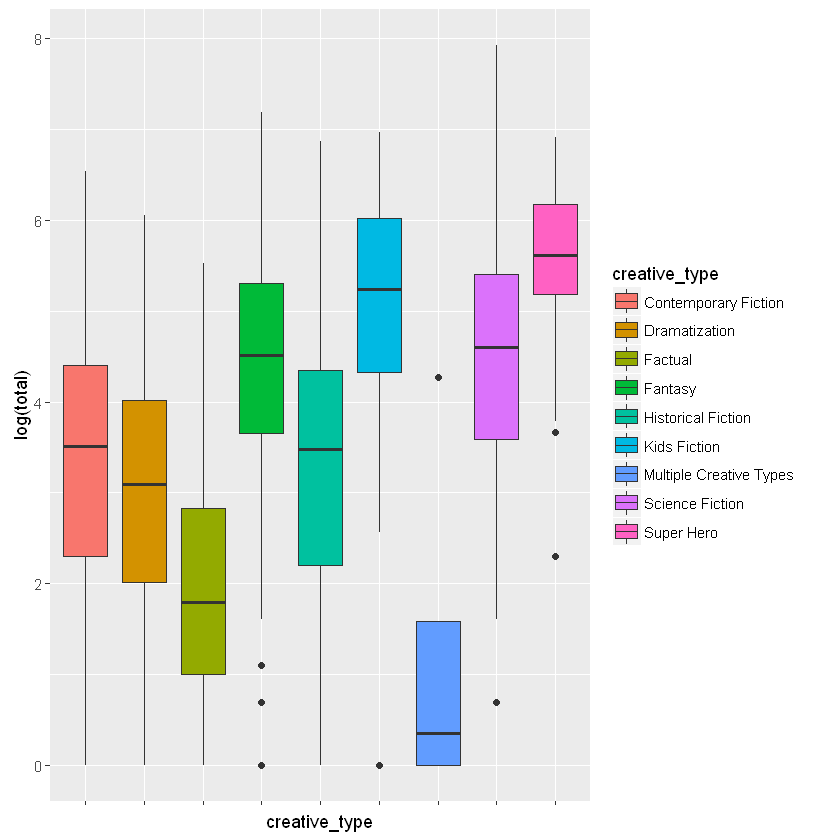

In [19]:
#Analyzing creative_type column with total
ggplot(data = mdata, aes(x = creative_type, y = log(total), fill = creative_type)) + geom_boxplot() +
theme(axis.text.x = element_blank())

#Also checking their frequency counts
table(mdata$creative_type)

In [20]:
# Kids fiction, science fiction and superhero movies seem to be doing good compared to others
# Multiple creative types is poor performing but that could be because of their low count
# Merging all of these into one and creating an additional flag for it

mdata$creative_type <- ifelse(mdata$creative_type %in% c("Kids Fiction", "Science Fiction", "Super Hero", 
                            "Multiple Creative Types"), "other", mdata$creative_type)
mdata$creative_type_flag <- ifelse(mdata$creative_type=="other",1,0)




       Based on Comic/Graphic Novel       Based on Factual Book/Article 
                                 36                                  23 
  Based on Fiction Book/Short Story Based on Folk Tale/Legend/Fairytale 
                                218                                  10 
                      Based on Game           Based on Musical or Opera 
                                  8                                   4 
                      Based on Play           Based on Real Life Events 
                                 21                                 128 
                Based on Short Film            Based on Theme Park Ride 
                                  4                                   2 
                       Based on Toy                         Based on TV 
                                  2                                  38 
                        Compilation                 Original Screenplay 
                                  3               

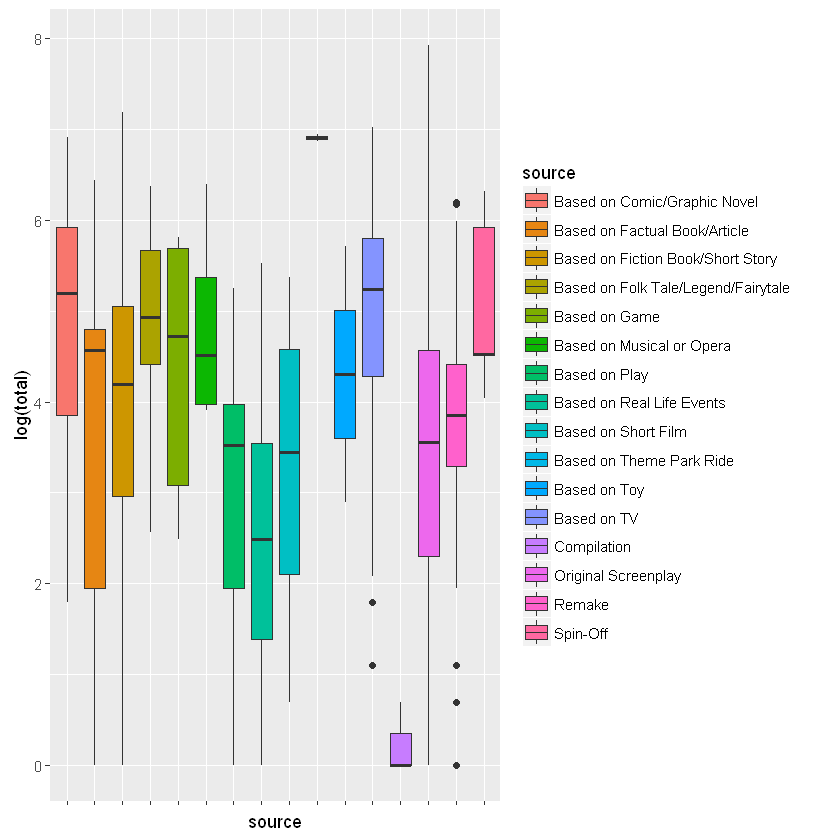

In [22]:
#Analyzing source in similar way
table(mdata$source)

ggplot(data = mdata, aes(x = source, y = log(total), fill = source)) + geom_boxplot() +
    theme(axis.text.x = element_blank())
 
 